# Overview

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from gatzzt import diff_unique

In [2]:
df_train = pd.read_csv('data/sales_train.csv.gz', compression='gzip')
df_test = pd.read_csv('data/test.csv.gz', compression='gzip')
df_shops = pd.read_csv('data/shops.csv')
df_item_categories = pd.read_csv('data/item_categories.csv')
df_items = pd.read_csv('data/items.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv.gz',compression='gzip')

In [3]:
df_items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [4]:
l = list(df_item_categories.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


df_item_categories['big_cats'] = l_cat
df_item_categories.head()

,item_category_name,item_category_id,big_cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


In [5]:
df_train = pd.merge(df_train, df_items)
df_train = pd.merge(df_train, df_item_categories)
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,big_cats
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie


In [6]:
df_test = pd.merge(df_test, df_items)
df_test = pd.merge(df_test, df_item_categories)
df_test.head()

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,big_cats
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Consoles Games
1,5100,4,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Consoles Games
2,10200,6,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Consoles Games
3,15300,3,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Consoles Games
4,20400,2,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Consoles Games


In [7]:
df_train.nunique()

date                   1034
date_block_num           34
shop_id                  60
item_id               21807
item_price            19993
item_cnt_day            198
item_name             21807
item_category_id         84
item_category_name       84
big_cats                 20
dtype: int64

In [8]:
df_test.nunique()

ID                    214200
shop_id                   42
item_id                 5100
item_name               5100
item_category_id          62
item_category_name        62
big_cats                  16
dtype: int64

In [9]:
for col in ['shop_id', 'item_id', 'item_category_id']:
    d1, d2 = diff_unique(df_train[col], df_test[col])
    print(col, len(d1), len(d2))

shop_id 18 0
item_id 17070 363
item_category_id 22 0


In [10]:
pd.options.display.float_format = '{:20,.2f}'.format
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,"2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00"
mean,14.57,33.00,"10,197.23",890.85,1.24,40.00
std,9.42,16.23,"6,324.30","1,729.80",2.62,17.10
min,0.00,0.00,0.00,-1.00,-22.00,0.00
25%,7.00,22.00,"4,476.00",249.00,1.00,28.00
50%,14.00,31.00,"9,343.00",399.00,1.00,40.00
75%,23.00,47.00,"15,684.00",999.00,1.00,55.00
max,33.00,59.00,"22,169.00","307,980.00","2,169.00",83.00


In [11]:
df_train['date_formatted'] = pd.to_datetime(df_train.date, format="%d.%m.%Y")
df_train[['day','month','year']] = df_train.date.str.split('.',expand=True)
df_train['date_month'] = (df_train.year + df_train.month)
df_train['sales'] = df_train.item_price * df_train.item_cnt_day

/Users/liew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


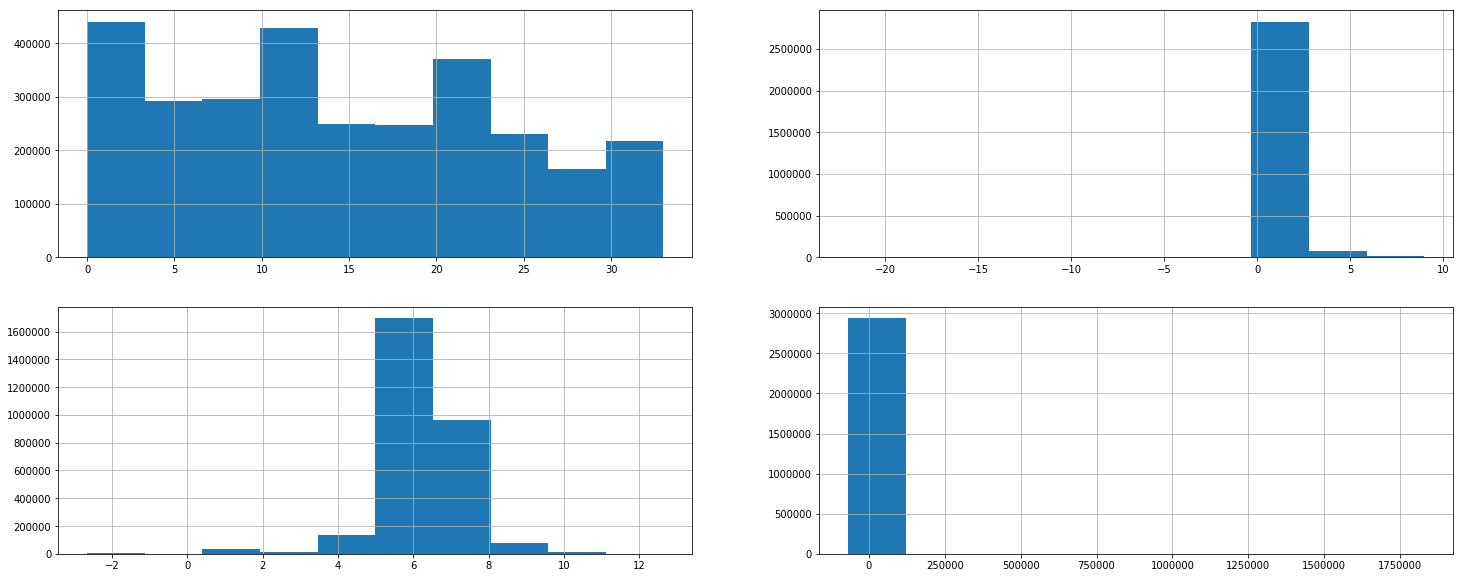

In [12]:
fig, axes = plt.subplots(2,2, figsize=(25,10))
df_train.date_block_num.hist(ax=axes[0][0])
df_train[df_train['item_cnt_day'] < 10].item_cnt_day.hist(ax=axes[0][1])
np.log(df_train['item_price']).hist(ax=axes[1][0])
df_train.sales.hist(ax=axes[1][1])

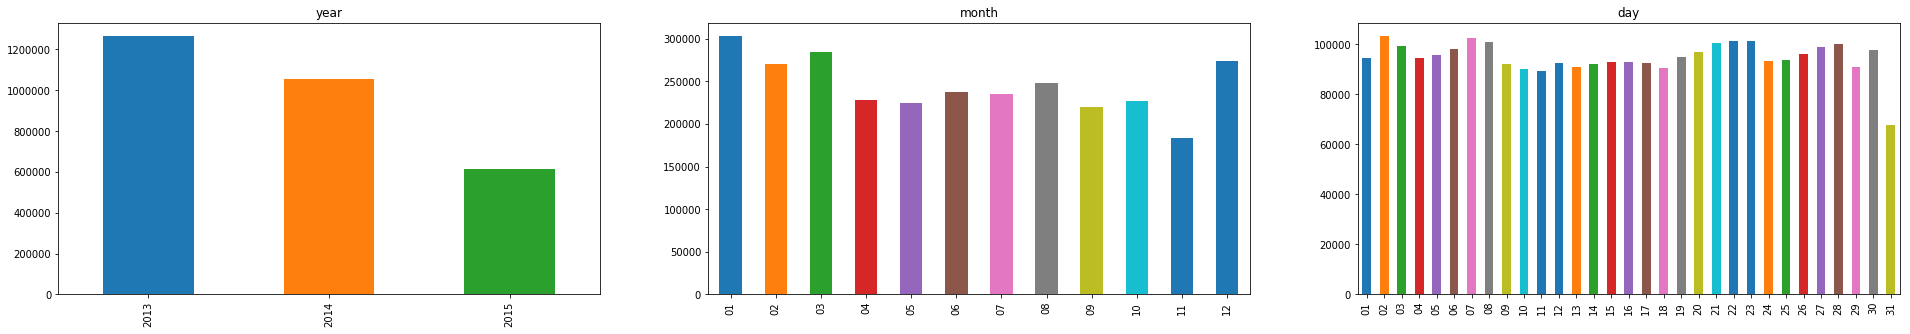

In [13]:
fig, axes = plt.subplots(1,3, figsize=(33,5))

df_train.year.value_counts().sort_index().plot.bar(ax=axes[0],title='year')
df_train.month.value_counts().sort_index().plot.bar(ax=axes[1],title='month')
df_train.day.value_counts().sort_index().plot.bar(ax=axes[2],title='day')

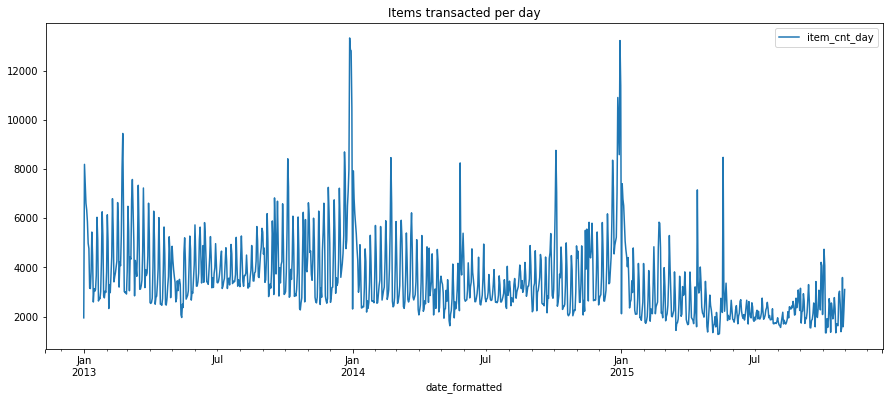

In [14]:
df_train.groupby('date_formatted').agg({"item_cnt_day": "sum"}).plot(figsize=(15,6),title="Items transacted per day")

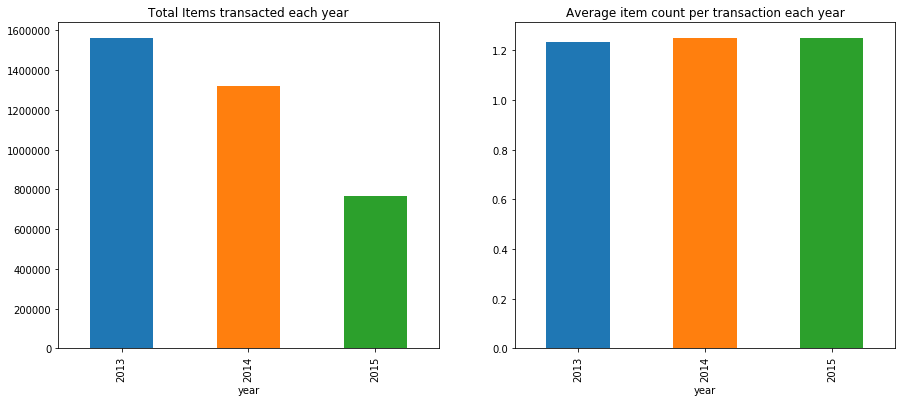

In [15]:
fig, axes = plt.subplots(1,2, figsize=(33,5))

df_train.groupby('year').item_cnt_day.sum().plot.bar(figsize=(15,6),title="Total Items transacted each year", ax=axes[0])
df_train.groupby('year').item_cnt_day.mean().plot.bar(figsize=(15,6),title="Average item count per transaction each year", ax=axes[1])

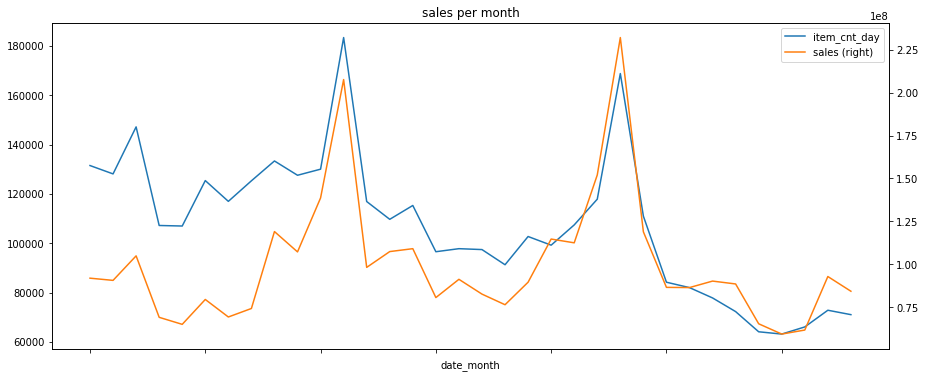

In [16]:
ax = df_train.groupby('date_month').agg({"item_cnt_day": "sum"}).plot(figsize=(15,6),title="Items transacted per month")
df_train.groupby('date_month').agg({"sales": "sum"}).plot(title="sales per month", ax=ax, secondary_y=True)

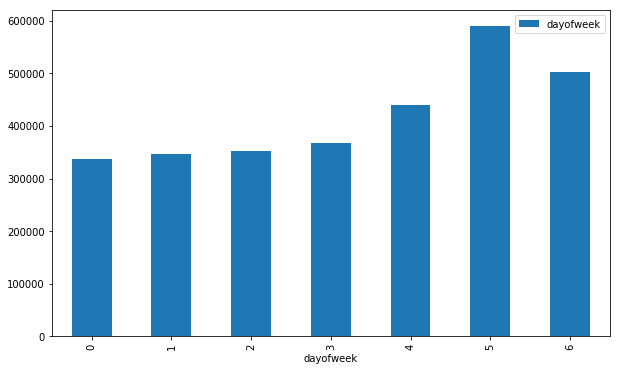

In [17]:
df_train['dayofweek'] = df_train.date_formatted.dt.dayofweek # The day of the week with Monday=0, Sunday=6
df_train.groupby("dayofweek").agg({"dayofweek": "count"}).plot.bar(figsize=(10, 6));

[Text(0,0.5,'average item_cnt_day'), Text(0.5,0,'date month')]

[Text(0,0.5,'sum item_cnt_day'), Text(0.5,0,'date month')]

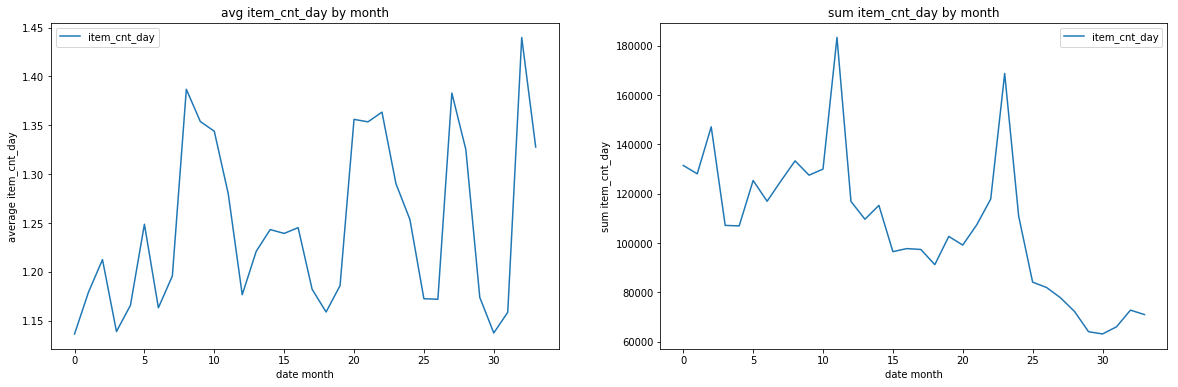

In [18]:
fig, axes = plt.subplots(1,2, figsize=(25,5))
ax = df_train.groupby('date_month').item_cnt_day.mean().reset_index().plot(x_compat=True,title="avg item_cnt_day by month", figsize=(20,6), ax=axes[0])
ax.set(xlabel='date month', ylabel='average item_cnt_day')

ax = df_train.groupby('date_month').item_cnt_day.sum().reset_index().plot(x_compat=True,title="sum item_cnt_day by month", figsize=(20,6), ax=axes[1])
ax.set(xlabel='date month', ylabel='sum item_cnt_day')

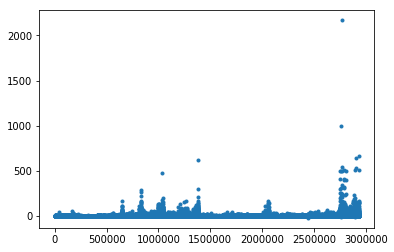

In [19]:
plt.plot(df_train.item_cnt_day,'.')

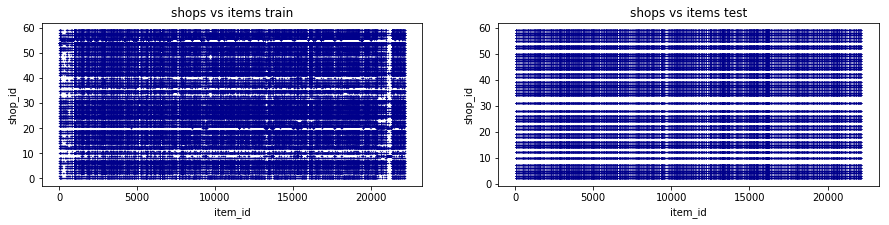

In [20]:
# plot items for each shop -- training set vs test set
fix, axes = plt.subplots(1,2,figsize=(15,3))

df_train.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='DarkBlue', s = 0.1, ax=axes[0], title="shops vs items train")
df_test.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='DarkBlue', s = 0.1, ax=axes[1], title="shops vs items test")

# item and category

In [21]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,big_cats,date_formatted,day,month,year,date_month,sales,dayofweek
0,02.01.2013,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-02,02,01,2013,201301,999.00,2
1,23.01.2013,0,24,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-23,23,01,2013,201301,999.00,2
2,20.01.2013,0,27,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-20,20,01,2013,201301,999.00,6
3,02.01.2013,0,25,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-02,02,01,2013,201301,999.00,2
4,03.01.2013,0,25,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-03,03,01,2013,201301,999.00,3


In [22]:
df_train_month_item = df_train.groupby(['item_id', 'date_month']).agg({"item_cnt_day": "sum", "sales": "sum"})
df_train_month_item.head()

item_cnt_day                sales
item_id date_month                                          
0       201409                     1.00                58.00
1       201404                     2.00             8,980.00
        201407                     1.00             4,490.00
        201408                     1.00             4,490.00
        201409                     1.00             4,490.00

/Users/liew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


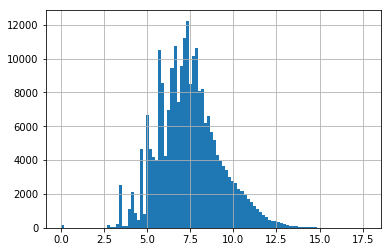

In [23]:
np.log(1 + df_train_month_item['sales']).hist(bins=100)

In [24]:
df_train_month_cat = df_train.groupby(['item_category_id', 'date_month']).agg({"item_cnt_day": "sum", "sales": "sum"})
df_train_month_cat.head()

item_cnt_day                sales
item_category_id date_month                                          
0                201301                     1.00               148.00
                 201302                     1.00                93.00
                 201304                     1.00                22.40
1                201301                     1.00               148.00
                 201302                     1.00               283.00

In [25]:
dict_cat_name = df_item_categories.set_index('item_category_id')['item_category_name'].to_dict()

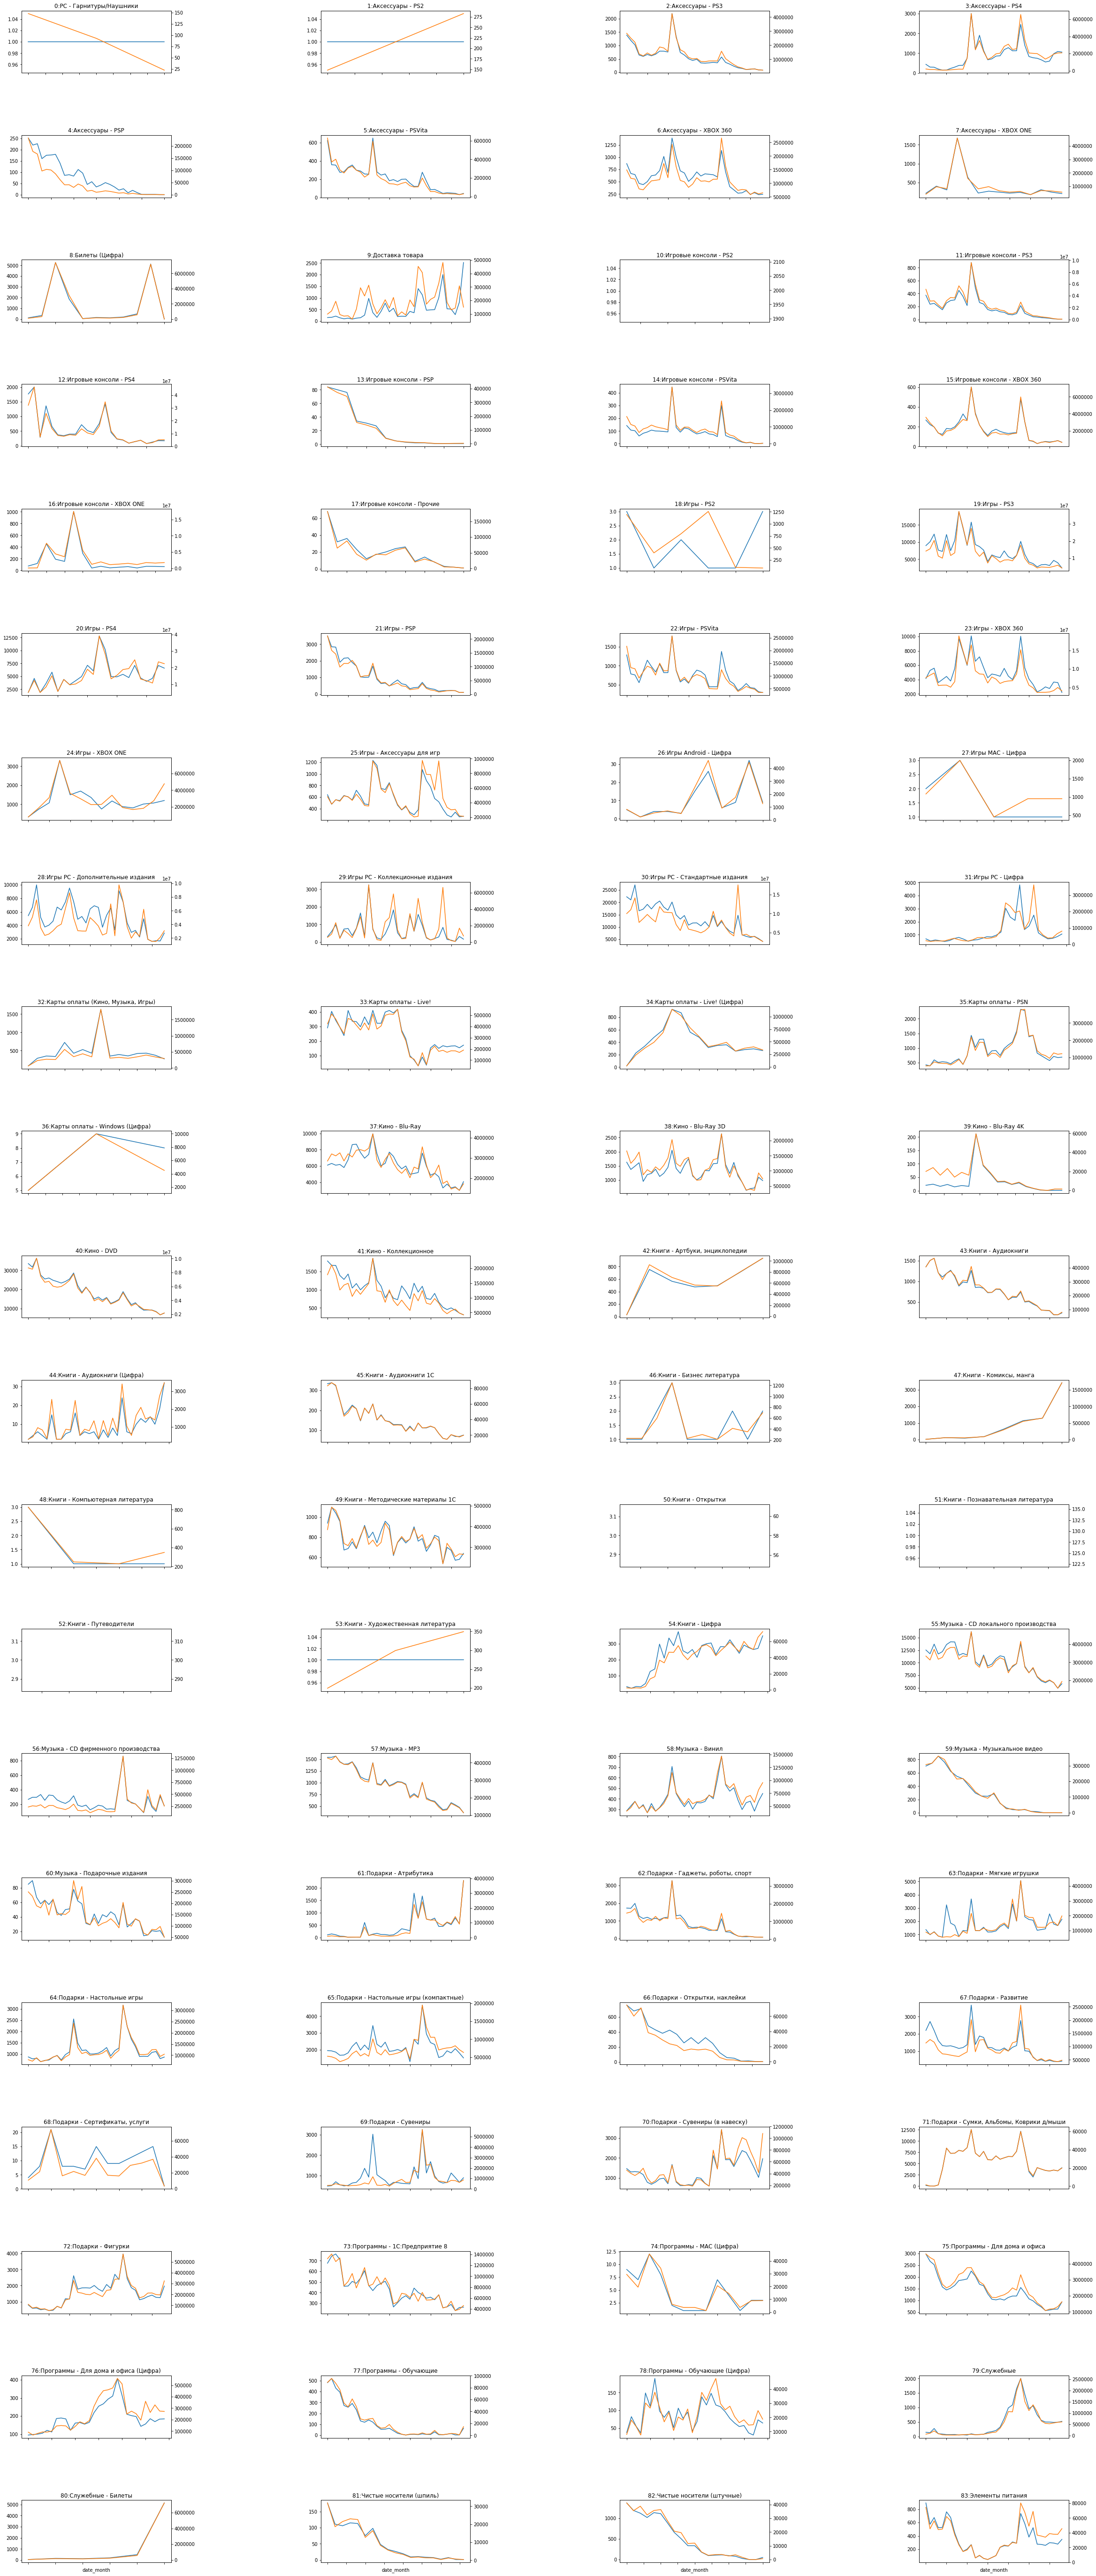

In [29]:
fig, axes = plt.subplots(21,4, figsize=(40,100))
plt.subplots_adjust(wspace=1, hspace=1);
for i, (idd, name) in enumerate(dict_cat_name.items()):
    if len(df_train_month_cat.loc[idd]) > 0:
        dum = df_train_month_cat.loc[idd]['item_cnt_day'].plot(ax=axes[i//4, i%4], secondary_y=['sales'], title=str(idd) + ':' + name)

In [27]:
1

1